<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.733878,34.385756,47.015757,62.909044,4.620230,227.664665,129.853451,97.811214
1,0.0,1.0,93.234991,81.858459,72.013938,64.924996,208.238166,530.270549,369.338544,160.932006
2,0.0,2.0,40.727080,65.867775,94.354926,79.354453,74.625271,364.929506,431.807565,-66.878059
3,0.0,3.0,28.286734,31.072088,84.843657,73.856125,-250.031427,-21.972823,313.323679,-335.296502
4,0.0,4.0,38.848645,75.571309,89.090359,91.129292,453.533193,758.172798,400.388769,357.784029
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,50.344411,68.503387,91.964551,49.713744,-232.599332,37.926761,129.707663,-91.780902
19996,999.0,16.0,26.057397,22.319830,21.469100,91.859817,15.384099,187.090244,-44.920455,232.010699
19997,999.0,17.0,62.359250,98.327183,39.300657,61.828624,1017.071261,1288.886974,635.449120,653.437854
19998,999.0,18.0,51.397370,72.717604,66.280758,32.089062,170.357909,402.842703,71.929226,330.913477


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    68.733878  34.385756  47.015757  62.909044     4.620230   
      1.0    93.234991  81.858459  72.013938  64.924996   208.238166   
      2.0    40.727080  65.867775  94.354926  79.354453    74.625271   
      3.0    28.286734  31.072088  84.843657  73.856125  -250.031427   
      4.0    38.848645  75.571309  89.090359  91.129292   453.533193   
...                ...        ...        ...        ...          ...   
999.0 15.0   50.344411  68.503387  91.964551  49.713744  -232.599332   
      16.0   26.057397  22.319830  21.469100  91.859817    15.384099   
      17.0   62.359250  98.327183  39.300657  61.828624  1017.071261   
      18.0   51.397370  72.717604  66.280758  32.089062   170.357909   
      19.0   38.612383  75.863823  63.302923  82.239946  -336.745959   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     227.664665  129.853451   97.811214  
      1.0     530.270549  369.338544  160.932006  
      2.0     364.929506  431.807565  -66.878059  
      3.0     -21.972823  313.323679 -335.296502  
      4.0     758.172798  400.388769  357.784029  
...                  ...         ...         ...  
999.0 15.0     37.926761  129.707663  -91.780902  
      16.0    187.090244  -44.920455  232.010699  
      17.0   1288.886974  635.449120  653.437854  
      18.0    402.842703   71.929226  330.913477  
      19.0    -66.726884  351.285093 -418.011976  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    68.733878  34.385756  47.015757  62.909044     4.620230   
      1.0    93.234991  81.858459  72.013938  64.924996   208.238166   
      2.0    40.727080  65.867775  94.354926  79.354453    74.625271   
      3.0    28.286734  31.072088  84.843657  73.856125  -250.031427   
      4.0    38.848645  75.571309  89.090359  91.129292   453.533193   
...                ...        ...        ...        ...          ...   
999.0 15.0   50.344411  68.503387  91.964551  49.713744  -232.599332   
      16.0   26.057397  22.319830  21.469100  91.859817    15.384099   
      17.0   62.359250  98.327183  39.300657  61.828624  1017.071261   
      18.0   51.397370  72.717604  66.280758  32.089062   170.357909   
      19.0   38.612383  75.863823  63.302923  82.239946  -336.745959   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     227.664665  129.853451   97.811214  
      1.0     530.270549  369.338544  160.932006  
      2.0     364.929506  431.807565  -66.878059  
      3.0     -21.972823  313.323679 -335.296502  
      4.0     758.172798  400.388769  357.784029  
...                  ...         ...         ...  
999.0 15.0     37.926761  129.707663  -91.780902  
      16.0    187.090244  -44.920455  232.010699  
      17.0   1288.886974  635.449120  653.437854  
      18.0    402.842703   71.929226  330.913477  
      19.0    -66.726884  351.285093 -418.011976  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.733878,34.385756,47.015757,62.909044,4.620230,227.664665,129.853451,97.811214
1,0.0,1.0,93.234991,81.858459,72.013938,64.924996,208.238166,530.270549,369.338544,160.932006
2,0.0,2.0,40.727080,65.867775,94.354926,79.354453,74.625271,364.929506,431.807565,-66.878059
3,0.0,3.0,28.286734,31.072088,84.843657,73.856125,-250.031427,-21.972823,313.323679,-335.296502
4,0.0,4.0,38.848645,75.571309,89.090359,91.129292,453.533193,758.172798,400.388769,357.784029
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,50.344411,68.503387,91.964551,49.713744,-232.599332,37.926761,129.707663,-91.780902
19996,999.0,16.0,26.057397,22.319830,21.469100,91.859817,15.384099,187.090244,-44.920455,232.010699
19997,999.0,17.0,62.359250,98.327183,39.300657,61.828624,1017.071261,1288.886974,635.449120,653.437854
19998,999.0,18.0,51.397370,72.717604,66.280758,32.089062,170.357909,402.842703,71.929226,330.913477


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    68.733878  34.385756  47.015757  62.909044     4.620230   
      1.0    93.234991  81.858459  72.013938  64.924996   208.238166   
      2.0    40.727080  65.867775  94.354926  79.354453    74.625271   
      3.0    28.286734  31.072088  84.843657  73.856125  -250.031427   
      4.0    38.848645  75.571309  89.090359  91.129292   453.533193   
...                ...        ...        ...        ...          ...   
999.0 15.0   50.344411  68.503387  91.964551  49.713744  -232.599332   
      16.0   26.057397  22.319830  21.469100  91.859817    15.384099   
      17.0   62.359250  98.327183  39.300657  61.828624  1017.071261   
      18.0   51.397370  72.717604  66.280758  32.089062   170.357909   
      19.0   38.612383  75.863823  63.302923  82.239946  -336.745959   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     227.664665  129.853451   97.811214  
      1.0     530.270549  369.338544  160.932006  
      2.0     364.929506  431.807565  -66.878059  
      3.0     -21.972823  313.323679 -335.296502  
      4.0     758.172798  400.388769  357.784029  
...                  ...         ...         ...  
999.0 15.0     37.926761  129.707663  -91.780902  
      16.0    187.090244  -44.920455  232.010699  
      17.0   1288.886974  635.449120  653.437854  
      18.0    402.842703   71.929226  330.913477  
      19.0    -66.726884  351.285093 -418.011976  

[20000 rows x 8 columns]

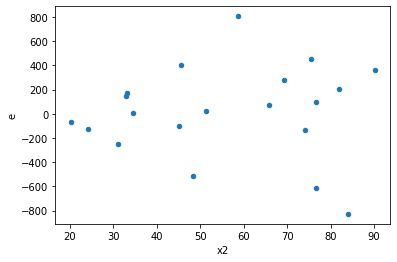

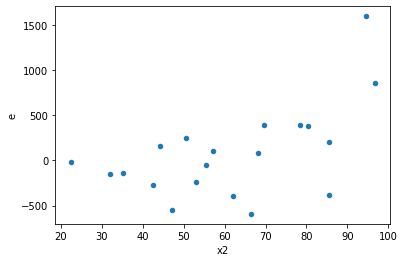

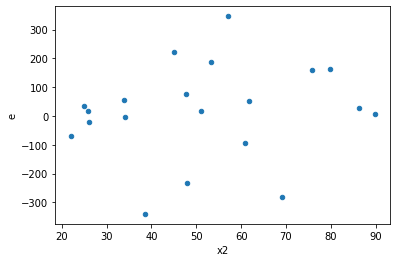

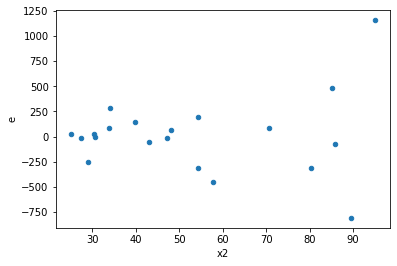

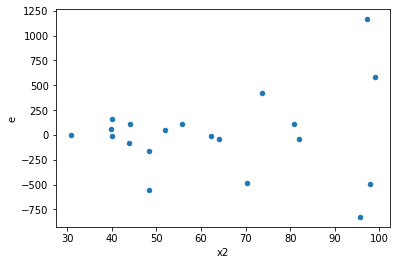

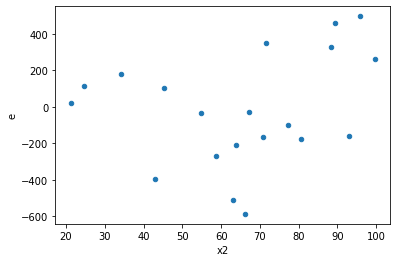

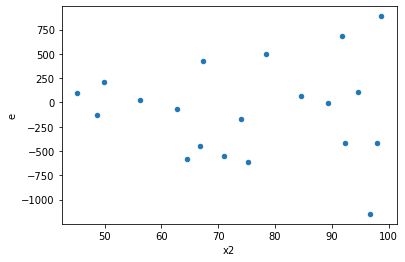

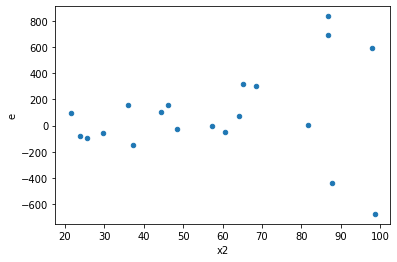

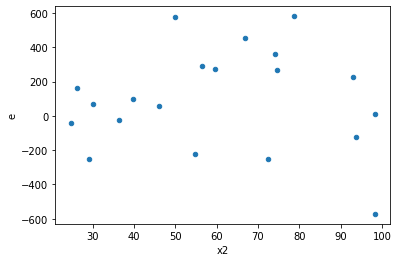

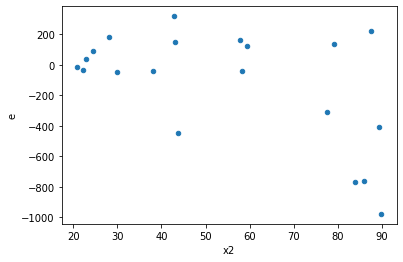

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,944979.0002772798,1104299.998079206,157496.5000462133,184049.99967986767,1.1685973950269557,0.8548146299765749,0.5725926850117126,0.42740731498828743,Reject001=1 : Homoscedasticity
1.0,1.0,11.0,5.84004456643426e-23,1743066.4355133716,5.84004456643426e-23,158460.58504667014,2.713345476118874e+27,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
2.0,8.0,4.0,187303.16638266383,152548.01840450798,23412.895797832978,38137.004601126995,1.6288888367519592,0.6705743598891825,0.6647128200554088,0.33528717994459123,Reject001=1 : Homoscedasticity
3.0,5.0,7.0,55677.099788747044,1060241.9595446454,11135.41995774941,151463.1370778065,13.601924099180437,0.0034421405078328693,0.9982789297460836,0.0017210702539164346,Reject001=0 : Heteroscedasticity
5.0,2.0,10.0,84430.26153973304,742730.0721263788,42215.13076986652,74273.00721263788,1.7593930388971937,0.44293654801769367,0.7785317259911532,0.22146827400884683,Reject001=1 : Homoscedasticity
6.0,3.0,9.0,247603.9922817648,1684421.7841186728,82534.6640939216,187157.97601318586,2.267628735972155,0.299259159251388,0.850370420374306,0.149629579625694,Reject001=1 : Homoscedasticity
7.0,5.0,7.0,56557.49984355417,1296633.5510991006,11311.499968710834,185233.36444272866,16.375667679362564,0.0019357265391835021,0.9990321367304082,0.0009678632695917511,Reject001=0 : Heteroscedasticity
9.0,8.0,4.0,285679.1522321193,270365.52619137696,35709.89402901491,67591.38154784424,1.892791434579029,0.5623359912602619,0.718832004369869,0.28116799563013095,Reject001=1 : Homoscedasticity
11.0,9.0,3.0,689234.0222519452,682105.1940281162,76581.55802799392,227368.39800937206,2.968970648602617,0.401391123622054,0.799304438188973,0.200695561811027,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,944979.0002772798,1104299.998079206,157496.5000462133,184049.99967986767,1.1685973950269557,0.8548146299765749,Reject001=1 : Homoscedasticity
1.0,1.0,11.0,5.84004456643426e-23,1743066.4355133716,5.84004456643426e-23,158460.58504667014,2.713345476118874e+27,0.0,Reject001=0 : Heteroscedasticity
2.0,8.0,4.0,187303.16638266383,152548.01840450798,23412.895797832978,38137.004601126995,1.6288888367519592,0.6705743598891825,Reject001=1 : Homoscedasticity
3.0,5.0,7.0,55677.099788747044,1060241.9595446454,11135.41995774941,151463.1370778065,13.601924099180437,0.0034421405078328693,Reject001=0 : Heteroscedasticity
4.0,4.0,8.0,329322.11526992265,392145.0970540946,82330.52881748066,49018.137131761825,0.5953822699284563,0.6476060602349915,Reject001=1 : Homoscedasticity
5.0,2.0,10.0,84430.26153973304,742730.0721263788,42215.13076986652,74273.00721263788,1.7593930388971937,0.44293654801769367,Reject001=1 : Homoscedasticity
6.0,3.0,9.0,247603.9922817648,1684421.7841186728,82534.6640939216,187157.97601318586,2.267628735972155,0.299259159251388,Reject001=1 : Homoscedasticity
7.0,5.0,7.0,56557.49984355417,1296633.5510991006,11311.499968710834,185233.36444272866,16.375667679362564,0.0019357265391835021,Reject001=0 : Heteroscedasticity
8.0,8.0,4.0,476143.57126793254,131195.71799429657,59517.94640849157,32798.92949857414,0.5510762967771792,0.4386910533619569,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      791
Reject001=0 : Heteroscedasticity    209
Name: Result_test, dtype: int64